# Group velocity and dispersion

Inserting the trial solution 

$$
u(x,t) = e^{i(\xi x - \omega t)}
$$

into the advection equation $\partial_t u + c\partial_x u= 0$ yields
$\omega - c \xi = 0$, or 

$$
\omega = c \xi.
$$

This equation is known as the **dispersion relation** of the PDE. We think of it as a constraint on $\omega$ as a function of $\xi$. Note that the solution has constant phase in the exponential when $\xi(x-\omega t/\xi)$ is constant, or $x = \text{constant} + t (\omega/xi)$. Thus we identify $\omega/\xi$ as the **phase velocity** of the solution.

Suppose now that $u(x,0)$ consists of waves at just two nearby wavenumbers, $\xi_0 \pm K$ for small $K$. Then the dispersion frequencies are

$$
\omega_0 \pm \omega'(\xi_0)K,
$$

and thus,

$$
u(x,t) = 2 e^{i(\xi_0 x - \omega_0 t)} \cos[K(x - \omega'(\xi_0) t) ].
$$

The term in front has the phase velocity $\omega_0/\xi_0$, but the other term is an envelope that moves at velocity $\omega'(\xi_0)$, which is known as the **group velocity**. 

This argument can be generalized to any *wave packet* initial condition that is highly concentrated in wavenumber around $\xi_0$. Group velocity is usually considered more physically relevant than phase velocity. 

For linear advection, phase and group velocities are the same, but that is the exception. For the linear equation

$$
\partial_t u + \partial_{xxx} u = 0,
$$

the dispersion relation is $\omega = -\xi^3$ and the group velocity is $-3\xi^2$, which is three times the phase velocity. The fact that the group velocity varies with the wavenumber is known as **dispersion**. Since most initial conditions comprise modes at all wavenumbers, shapes lose coherence as the higher wavenumbers move more quickly. 

We can also find the dispersion relation of the diffusion equation:

$$
\omega(\xi) = -i \xi^2.
$$

The negative imaginary part causes exponential decay in $\exp[i(\xi x-\omega t)]$, and the decay rate grows with the wavenumber. It's not terribly meaningful to discuss velocity for this relation.

<!-- Now suppose instead that $u(x,0)$ has a Fourier transform $\alpha(\xi)$. Then we can synthesize the solution at any time $t$ via

$$
u(x,t) = \int_{-\infty}^{\infty} \alpha(\xi) e^{i(\xi x - \omega t)} \,d\xi. 
$$

Suppose that $|\alpha|$ is highly concentrated near a wavenumber $K$. If we linearize the dispersion relation about $\xi=K$, then

$$
\omega(\xi) \approx \omega(K) + \omega'(K) (\xi-K),
$$

and if we set $W=\omega(K)$, we have

$$
\xi x - \omega t &\approx \xi x - W t - \omega'(K)t(\xi-K)    \\ 
&= Kx - W t + (\xi-K) x - \omega'(K)t(\xi-K).
$$

Thus,

$$
u(x,t) \approx e^{i(Kx - W t )} \int_{-\infty}^{\infty} \alpha(\xi) e^{i(\xi-K)(x - \omega'(K)t)} \,d\xi. 
$$


-->


## Semidiscrete

### Centered 

For a centered 2nd-order difference in space on the advection equation, we easily obtain

$$
\omega(\xi) = \frac{c}{h} \sin(\xi h).
$$

This suggests a phase velocity $c \sin(\xi h)/(\xi h)$, which closely approximates $c$ when $\xi h\approx 0$ but drops off to zero as $\xi h\to \pm \pi$. The group velocity is 

$$
\omega'(\xi) = c \cos(\xi h),
$$

which also agrees well with $c$ when $\xi h\approx 0$. However, at $\xi h=\pi/2$ the group velocity drops to zero, and as $\xi h\to \pm \pi$, it approaches $-c$. That is, high-wavenumber information can be expected to travel the wrong way!

In [1]:
include("diffmats.jl")
using OrdinaryDiffEq, Plots

In [2]:
n = 120;
h = 2π/n
println("sawtooth wavenumber is $(π/h)")

sawtooth wavenumber is 60.0


Here is a combination of a low-wavenumber and a high-wavenumber packet.

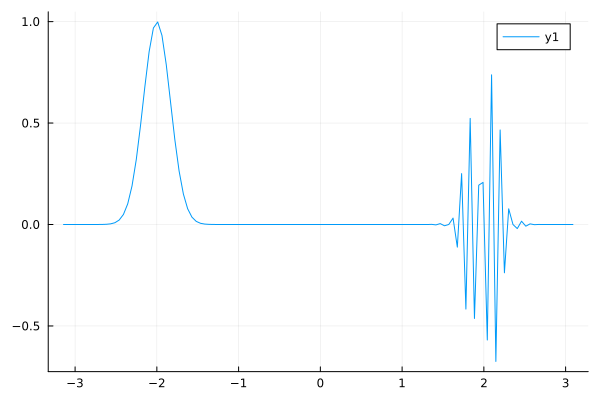

In [3]:
x,Dx,_ = diffmats(n,-π,π,periodic=true);
gauss = x -> exp(-18x^2)
u₀ = x -> gauss(x+2) + gauss(x-2).*sin(52x);
plot(x,u₀.(x))

When we solve the semidiscretization accurately for $c=1$, we can see how the high-wavenumber packet travels in the wrong direction:

In [4]:
c = 1
adv = (u,c,t) -> -c*Dx*u
ivp = ODEProblem(adv,u₀.(x),(0.,3.),c)
sol = solve(ivp,RK4(),abstol=1e-8,reltol=1e-8);

anim = @animate for t in range(0,3,121)
    plot(x,sol(t),ylims=(-1.2,1.2),label="",dpi=128)
end
mp4(anim,"groupvel1.mp4")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/Dropbox/class/817/notes/advection/groupvel1.mp4
└ @ Plots /Users/driscoll/.julia/packages/Plots/4UTBj/src/animation.jl:154


Plots.AnimatedGif("/Users/driscoll/Dropbox/class/817/notes/advection/groupvel1.mp4")

The semidiscrete equation is dispersive, so shapes lose there coherence in the numerical solution.

In [5]:
tent = @. max(0,1-abs(x))
ivp = ODEProblem(adv,tent,(0.,6.),c)
sol = solve(ivp,RK4(),abstol=1e-8,reltol=1e-8);

anim = @animate for t in range(0,6,121)
    plot(x,sol(t),ylims=(-1.2,1.2),label="",dpi=128)
end
mp4(anim,"groupvel2.mp4")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/Dropbox/class/817/notes/advection/groupvel2.mp4
└ @ Plots /Users/driscoll/.julia/packages/Plots/4UTBj/src/animation.jl:154


Plots.AnimatedGif("/Users/driscoll/Dropbox/class/817/notes/advection/groupvel2.mp4")

### Downwind 

Suppose $c>0$ and we consider a (necessarily unstable) downwind first-order discretization, the forward difference. The semidiscrete dispersion relation is now

$$
\omega(\xi) = \frac{ic}{h} (1 - e^{i\xi h}),
$$

with group velocity

$$
\omega'(\xi) = c e^{i\xi h}.
$$

What does a complex phase velocity mean? The real part can be interpreted as usual, but for all nonzero $\xi$ we also have a positive imaginary part, causing exponential growth in time for $e^{-i\omega t}$.

## Fully discrete

### Backward Euler

We now combine the centered difference in space with backward Euler in time. We insert the Fourier mode to get

$$
e^{-i \omega \tau} = 1 + \frac{ic\tau}{h} \sin(\xi h)e^{-i \omega \tau},
$$

or

$$
e^{i \omega \tau} - 1 = \frac{ic\tau}{h} \sin(\xi h).
$$

This is not very neat analytically, although it can be shown that $\omega$ will not have a positive imaginary part for any value of the time $\tau$.

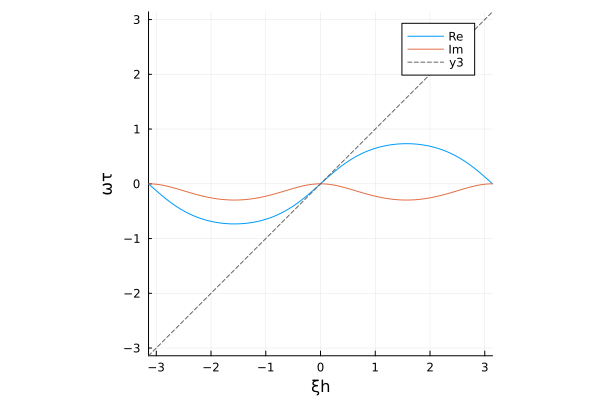

In [6]:
ξh = range(-π,π,200)
ωτ = @. -1im*log(1 + 0.9im*sin(ξh))
plot(ξh,real(ωτ),label="Re",aspect_ratio=1)
plot!(ξh,imag(ωτ),label="Im")
plot!(ξh,ξh,l=(Gray(0.4),:dash),
    xaxis=("ξh",[-π,π]),yaxis=("ωτ",[-π,π]))

The picture above suggests that most parts of the solution have decay simultaneous with the wave propagation.

### Midpoint

Let's combine the centered difference in space with a time integration scheme known as **midpoint** or **leapfrog**,

$$
v_{j+1} = v_{j-1} + 2\tau f_j. 
$$

We insert the Fourier mode to get

$$
e^{-i \omega \tau} = e^{i \omega \tau}  - 2\frac{ic\tau}{h} \sin(\xi h),
$$

or

$$
\sin({\omega \tau}) = \frac{c\tau}{h} \sin(\xi h).
$$

If $|c|\tau / h \le 1$, there are two real solutions for $\omega \tau$ for each value of $\xi$.

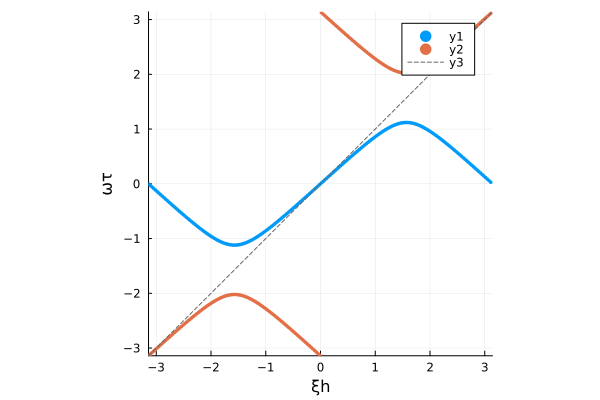

In [7]:
ωτ = @. asin(0.9*sin(ξh))
ωτ2 = @. mod(2π-ωτ,2π) - π
scatter(ξh,[ωτ ωτ2],m=2,msw=0,aspect_ratio=1)
plot!(ξh,ξh,l=(Gray(0.4),:dash),
    xaxis=("ξh",[-π,π]),yaxis=("ωτ",[-π,π]))

In [8]:
τ = 0.9h
init = x -> gauss(x)*sin(45x)
u₋ = @. init(x + c*τ)
u = init.(x)
anim = @animate for j in 1:100
    global u,u₋
    plot(x,u,ylims=(-1.2,1.2),label="",dpi=128)
    u₊ = u₋ + 2τ*(-c*Dx*u)
    u₋,u = u,u₊
end
mp4(anim,"groupvel3.mp4")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/Dropbox/class/817/notes/advection/groupvel3.mp4
└ @ Plots /Users/driscoll/.julia/packages/Plots/4UTBj/src/animation.jl:154


Plots.AnimatedGif("/Users/driscoll/Dropbox/class/817/notes/advection/groupvel3.mp4")

But if $|c|\tau / h > 1$, there will be nonreal solutions that mean exponential instability in time.

In [9]:
asin(complex(1.1))

1.5707963267948966 + 0.4435682543851153im